In [14]:
%matplotlib inline
import numpy as np
from scipy.linalg import solve_lyapunov
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette('colorblind')
plt.rcParams["figure.figsize"] = (10, 8)

In [15]:
N_burn = 200000
N_iter = 10000

lr = 0.05
m = 20

mat = np.random.randn(2, 2)*10
C = mat@mat.T #+ 1*np.eye(2)
B = np.linalg.cholesky(C)

mat2 = np.random.randn(2,2)*2
H = mat2@mat2.T#+ 1e-1*np.eye(2)

theta = np.random.randn(2, )

In [16]:
for i in range(N_burn):
    theta -= lr*H@theta + lr/np.sqrt(m)*B@np.random.randn(2, )

In [17]:
all_theta = np.zeros((N_iter, 2))
for i in range(N_iter):
    all_theta[i] = theta
    theta -= lr*H@theta + lr/np.sqrt(m)*B@np.random.randn(2,)

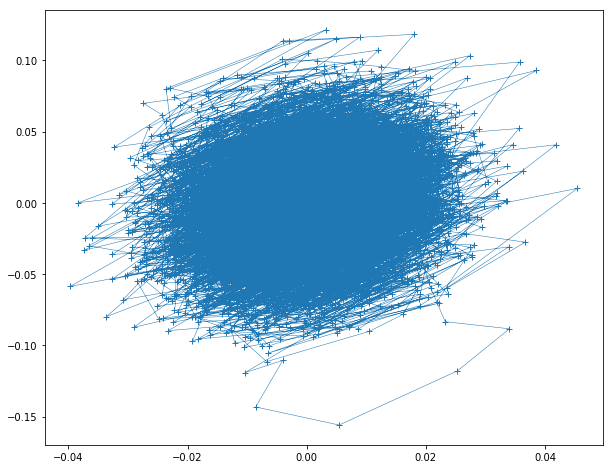

In [18]:
plt.plot(all_theta[:, 0], all_theta[:, 1], '-+', linewidth=0.5)


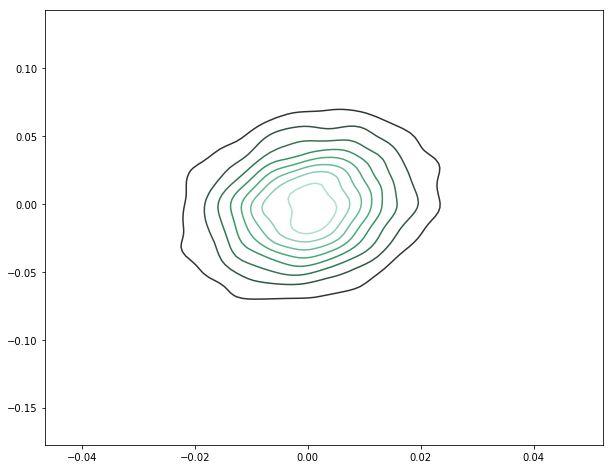

In [19]:
sns.kdeplot(all_theta[:, 0], all_theta[:, 1])

In [60]:
# x = np.linspace(-0.5, 0.5, 100)
# y = np.linspace(-0.5, 0.5, 100)
# X, Y = np.meshgrid(x, y)
# XY = np.concatenate([X.reshape(100, 100, 1), Y.reshape(100, 100, 1)], 2)
# z = []

ValueError: shapes (100,100,2) and (2,100,100) not aligned: 2 (dim 2) != 100 (dim 1)

In [59]:
np.rollaxis(XY, 2).shape

(2, 100, 100)

In [20]:
sigma = solve_lyapunov(H, lr*C/m)

In [21]:
np.mean(all_theta, 0)

array([ 8.53035623e-05, -1.25865252e-03])

In [22]:
sigma_th = np.cov(all_theta.T)
print(sigma_th)

[[1.11988547e-04 6.24101562e-05]
 [6.24101562e-05 1.09608781e-03]]


In [23]:
sigma

array([[6.10872481e-05, 3.04070095e-05],
       [3.04070095e-05, 1.01855540e-03]])

In [24]:
sigma/sigma_th

array([[0.54547764, 0.48721252],
       [0.48721252, 0.92926441]])

In [25]:
np.trace(np.linalg.inv(H)@C)*lr/m

0.002159285287260005

In [26]:
# from matplotlib.patches import Ellipse

# delta = 45.0  # degrees

# angles = np.arange(0, 360 + delta, delta)
# ells = [Ellipse((1, 1), 4, 2, a) for a in angles]

# lambda_, v = np.linalg.eig(cov)
# lambda_ = np.sqrt(lambda_) 
# ell = Ellipse(xy=(0, 0),
#                   width=lambda_[0]*2, height=lambda_[1]*2,
#                   angle=np.rad2deg(np.arccos(v[0, 0])))
                 
# a = plt.subplot(111, aspect='equal')


# ell.set_clip_box(a.bbox)
# ell.set_alpha(0.1)
# ell.add_artist(e)
    
# plt.xlim(-2, 4)
# plt.ylim(-1, 3)



NameError: name 'cov' is not defined

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def plot_point_cov(points, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma ellipse based on the mean and covariance of a point
    "cloud" (points, an Nx2 array).
    Parameters
    ----------
        points : An Nx2 array of the data points.
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.
    Returns
    -------
        A matplotlib ellipse artist
    """
    pos = points.mean(axis=0)
    cov = np.cov(points, rowvar=False)
    return plot_cov_ellipse(cov, pos, nstd, ax, **kwargs)

def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.
    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.
    Returns
    -------
        A matplotlib ellipse artist
    """
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip



In [ ]:
#-- Example usage -----------------------
# Generate some random, correlated data
points = np.random.multivariate_normal(
        mean=(1,1), cov=[[0.4, 9],[9, 10]], size=1000
        )
# Plot the raw points...
x, y = points.T
plt.plot(x, y, 'ro')

# Plot a transparent 3 standard deviation covariance ellipse
plot_point_cov(points, nstd=3, alpha=0.5, color='green')

plt.show()